In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import pickle

2023-04-06 12:27:28.249500: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 12:27:29.234015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
cifar100 = tf.keras.datasets.cifar100

(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


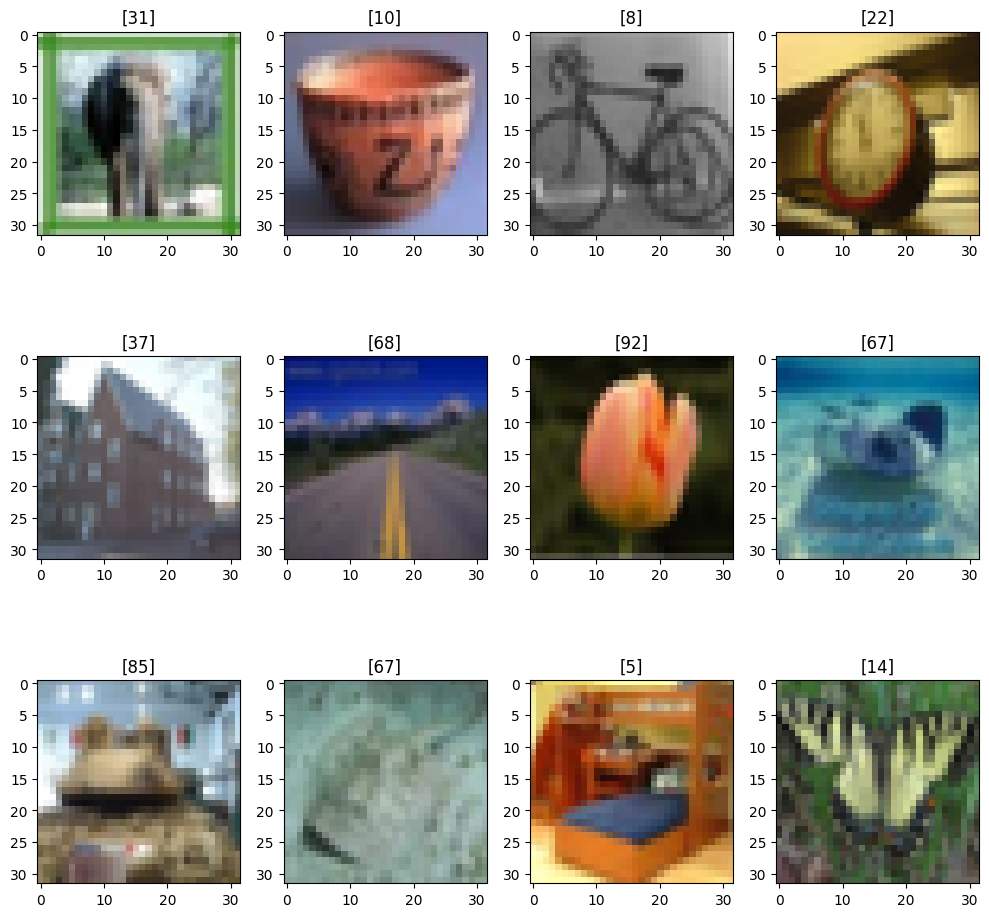

In [3]:
def show_samples(data, labels):
  plt.subplots(figsize=(10,10))
  for i in range(12):
    plt.subplot(3, 4, i+1)
    k = np.random.randint(0, data.shape[0])
    plt.title(labels[k])
    plt.imshow(data[k])
  plt.tight_layout()
  plt.show()

show_samples(x_train, y_train)

In [5]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  []


In [5]:
y_train = tf.one_hot(y_train, 
                     depth=y_train.max()+1,
                     dtype=tf.float64)

y_val = tf.one_hot(y_val,
                   depth=y_val.max()+1,
                   dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [6]:
model = tf.keras.models.Sequential([
  layers.Conv2D(16,(3,3),activation='relu',
                input_shape=(32,32,3),padding='same'),
  layers.Conv2D(32,(3,3),activation='relu',
                input_shape=(32,32,3),padding='same'),
  layers.Conv2D(64,(3,3),activation='relu',
                input_shape=(32,32,3),padding='same'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(128,(3,3),activation='relu',
                input_shape=(32,32,3),padding='same'),
  
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(100, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                        

In [8]:
hist = model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=64,
                 verbose=1,
                 validation_data=(x_val, y_val))

Epoch 1/10


2023-04-06 11:46:51.086188: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 153600000 exceeds 10% of free system memory.


110/782 [===>..........................] - ETA: 4:23 - loss: 4.5324 - auc: 0.6624 - accuracy: 0.0469

KeyboardInterrupt: 

In [ ]:
temp = model.get_layer('conv2d_3')
last_output = temp.output
last_output.shape

In [ ]:
x = layers.Flatten()(last_output)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

output = layers.Dense(10, activation='softmax')(x)

model_new = keras.Model(model.input, output)

In [ ]:
model_new.summary()

In [ ]:
model_new.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_val, y_val) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

In [ ]:
y_train = tf.one_hot(y_train, 
                     depth=10,
                     dtype=tf.float64)

y_val = tf.one_hot(y_val,
                   depth=10,
                   dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [ ]:
history = model_new.fit(x_train, y_train,
                 epochs=10,
                 batch_size=64,
                 verbose=1,
                 validation_data=(x_val, y_val))

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model_new, open(filename, 'wb'))